<a href="https://colab.research.google.com/github/Tiamiyu1/Python-for-Data-Science-and-Analytics/blob/main/Projects/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

## DS120



## Given store sales data, use Python to draw conclusions about how these stores are performing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
store=pd.read_csv('store_data.csv')

In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   week    200 non-null    object
 1   storeA  200 non-null    int64 
 2   storeB  200 non-null    int64 
 3   storeC  200 non-null    int64 
 4   storeD  200 non-null    int64 
 5   storeE  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [4]:
store.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [5]:
store.describe()

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


In [6]:
store.nunique()

week      200
storeA    196
storeB    196
storeC    193
storeD    193
storeE    193
dtype: int64

In [7]:
store['week'] = pd.to_datetime(store.week)

In [8]:
import datetime as dt
store['year'] = store['week'].dt.year
store['month'] = store['week'].dt.month
store['day'] = store['week'].dt.day

In [9]:
store

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
0,2014-05-04,2643,8257,3893,6231,1294,2014,5,4
1,2014-05-11,6444,5736,5634,7092,2907,2014,5,11
2,2014-05-18,9646,2552,4253,5447,4736,2014,5,18
3,2014-05-25,5960,10740,8264,6063,949,2014,5,25
4,2014-06-01,7412,7374,3208,3985,3023,2014,6,1
...,...,...,...,...,...,...,...,...,...
195,2018-01-28,282,6351,7759,5558,1028,2018,1,28
196,2018-02-04,4853,6503,4187,5956,1458,2018,2,4
197,2018-02-11,9202,3677,4540,6186,243,2018,2,11
198,2018-02-18,3512,7511,4151,5596,3501,2018,2,18


### 1. Which store has the highest total sales for the final month of data?

In [10]:
b = store.tail(4)
b

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
196,2018-02-04,4853,6503,4187,5956,1458,2018,2,4
197,2018-02-11,9202,3677,4540,6186,243,2018,2,11
198,2018-02-18,3512,7511,4151,5596,3501,2018,2,18
199,2018-02-25,7560,6904,3569,5045,2585,2018,2,25


In [11]:
d = b.sum()
d

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
year       8072
month         8
day          58
dtype: int64

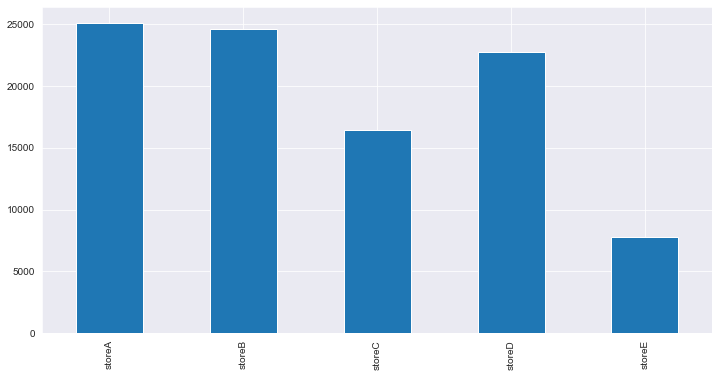

In [12]:
plt.figure(figsize=(12,6))
d.drop(['year','month', 'day']).plot.bar()

StoreA has the highest total sales for the final month of data

### 2. Which store makes the most sales on average?

In [13]:
store.mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
year      2015.735
month        6.645
day         15.775
dtype: float64

StoreB makes the most sales on an average

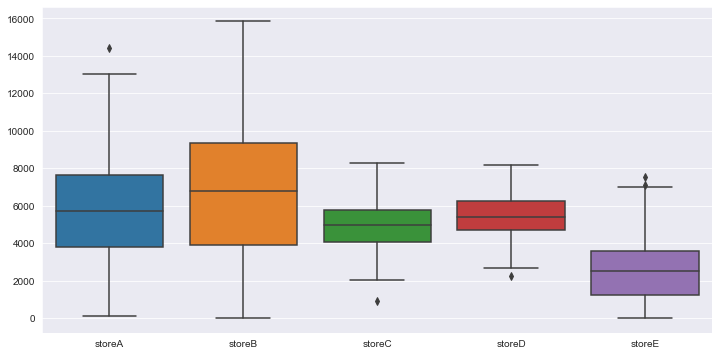

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(data = store.drop(['week', 'year', 'month', 'day'], axis=1))

### 3. Which store sells the most during the week of March 13th, 2016?

In [15]:
r = store[store['week']=='2016-03-13']
r

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
97,2016-03-13,2054,1390,5112,5513,2536,2016,3,13


StoreD makes the most sales in the week of March 13th, 2016

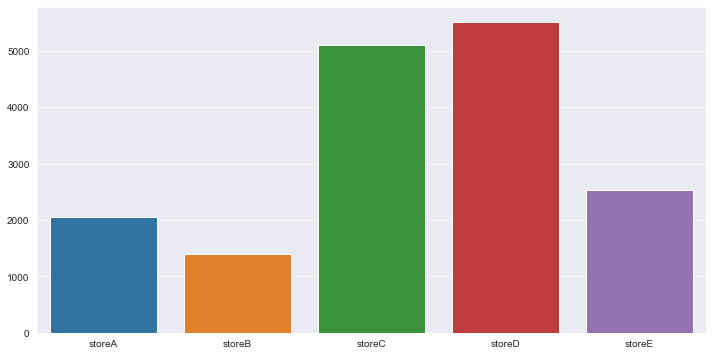

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=r.drop(['week', 'year', 'month', 'day'], axis=1))

### 4. In what week does store C make its worst sales?

In [17]:
a = store.storeC.min()
a

927

In [18]:
s = store[store['storeC']==927]
s

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
9,2014-07-06,8567,3228,927,3277,168,2014,7,6


storeC makes its worst sale in week 2014-07-06

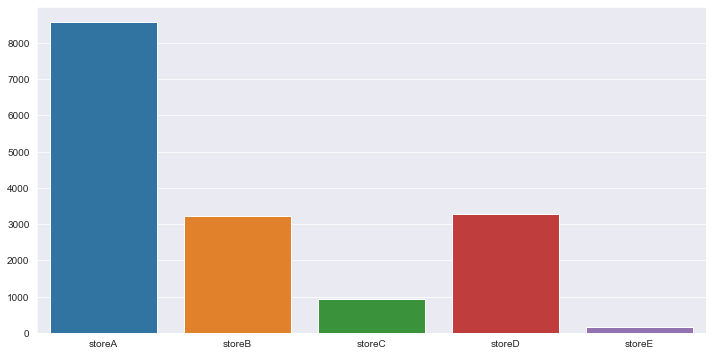

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(data = s.drop(['week', 'year', 'month', 'day'], axis=1))

### 5. Which store has the most sales in the latest 3-month period?

In [20]:
c = store.tail(13)
c

,week,storeA,storeB,storeC,storeD,storeE,year,month,day
187,2017-12-03,5179,3850,6121,6778,113,2017,12,3
188,2017-12-10,9348,5624,5446,5448,227,2017,12,10
189,2017-12-17,5310,8647,5680,7049,3578,2017,12,17
190,2017-12-24,8976,9503,6240,3882,2890,2017,12,24
191,2017-12-31,11875,1527,6711,5265,1701,2017,12,31
192,2018-01-07,8978,11312,4158,5019,3842,2018,1,7
193,2018-01-14,6963,4014,4215,7153,3097,2018,1,14
194,2018-01-21,5553,3971,3761,6255,3071,2018,1,21
195,2018-01-28,282,6351,7759,5558,1028,2018,1,28
196,2018-02-04,4853,6503,4187,5956,1458,2018,2,4


In [21]:
v = c.sum()
v

storeA    87591
storeB    79394
storeC    66538
storeD    75190
storeE    27334
year      26229
month        72
day         213
dtype: int64

StoreA has the most sales in the last 3 months

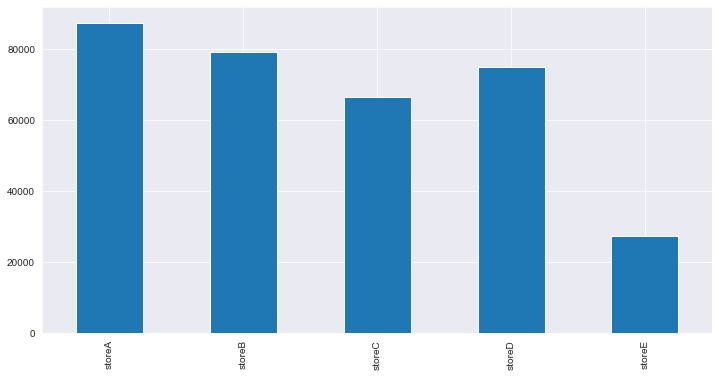

In [22]:
plt.figure(figsize=(12,6))
v.drop(['year','month', 'day']).plot.bar()